<a href="https://colab.research.google.com/github/IgorEisenlohr/MVP-sprint1/blob/main/MVP_SPRINT1_DATASCIENCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MVP - Sprint 1 - Ciência de Dados e Analytics

Aluno: Igor Miranda Eisenlohr

Objetivo: entender e descrever claramente o problema que está sendo resolvido. 

    Qual é a descrição do problema?
      * Prever o salário em dolar dos profissionais de Data Science no mercado
    Este é um problema de aprendizado supervisionado ou não supervisionado?
      * Problema de aprendizado supervisionado (Regressão)
    Que premissas ou hipóteses você tem sobre o problema?
      * Imagino que determinadas posições de senior possuem salários maiores e alguns cargos que exijam maiores conhecimentos do profissional tendem a pagar mais
    Que restrições ou condições foram impostas para selecionar os dados?
      * Dados escolhidos no kaggle. Condição: curiosidade a respeito dos dados
    Defina cada um dos atributos do dataset. 

Pré-processamento de dados: 

Objetivo: realizar operações de limpeza, tratamento e preparação dos dados. 

    Verifique quais operações de pré-processamento podem ser interessantes para o seu problema e salve visões diferentes do seu dataset (por exemplo, normalização, padronização, discretização e one-hot-encoding).
    Trate (removendo ou substituindo) os valores faltantes (se existentes).
    Realize outras transformações de dados porventura necessárias.
    Explique, passo a passo, as operações realizadas, justificando cada uma delas.
    Se julgar necessário, utilizando os dados pré-processados, volte na etapa de análise exploratória e verifique se surge algum insight diferente após as operações realizadas.

# Importando bibliotecas necessárias

In [5]:
#bibliotecas necessárias para manipulação e visualização dos dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

#estilo para os gráficos
plt.style.use('ggplot')

# Análise dos dados

In [7]:
#lendo o arquivo CSV armazenado no github
url ='https://raw.githubusercontent.com/IgorEisenlohr/MVP-sprint1/main/ds_salaries.csv'
df = pd.read_csv(url)

#Verifique as primeiras linhas do dataset. Algo chama a atenção?
#mostrando as 5 primeiras linhas do dataframe
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [8]:
#Quantos atributos e instâncias existem?
#tamanho dos dados em (linhas, colunas)
df.shape

(3755, 11)

In [14]:
#Quais são os tipos de dados dos atributos?
#informações sobre nome da coluna, valores não-nulos e tipo de cada feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


Podemos perceber que não temos nenhum valor diretamente nulo no dataframe e que os tipos das features fazem sentido

In [15]:
#Há valores faltantes?
#confirmando a presença de valores ausentes:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## Descrevendo os atributos do dataframe

In [16]:
#armazenando variáveis categóricas e variáveis numéricas
cat_cols = [] #array para armazenar colunas categóricas
num_cols = [] #array para armazenar colunas numéricas
for col in df.columns:  
  if df[col].dtype == 'object': #se o tipo for object
    cat_cols.append(col)        #armazena no categórico
  else:                         #se não:
    num_cols.append(col)        #armazena no numérico

In [18]:
#analisando os valores possíveis para as variáveis categóricas
for col in df[cat_cols].columns:
  print(f'{col} tem {df[col].nunique()} valores possíveis') #nunique() retorna o numéro de valores possíveis
  print(f'{df[col].unique()}')                              #unique() retorna a lista desses valores únicos
  print()

experience_level tem 4 valores possíveis
['SE' 'MI' 'EN' 'EX']

employment_type tem 4 valores possíveis
['FT' 'CT' 'FL' 'PT']

job_title tem 93 valores possíveis
['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'A

Explicando abreviações de algumas colunas
* experience_level
  * SE - Senior level
  * EN - Entry level
  * EX - Executive level
  * MI - Mid/Intermediate level

* employment_type
  * FT - Full time job
  * FL - Freelancer
  * CT - Contract
  * PT - Part time job

* company_size
  * L - Large
  * M - Medium
  * S - Small

In [37]:
# Há valores faltantes, discrepantes ou inconsistentes?
#analisando estatísticas descritivas dos dados numéricos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


## Boxplot

<Axes: >

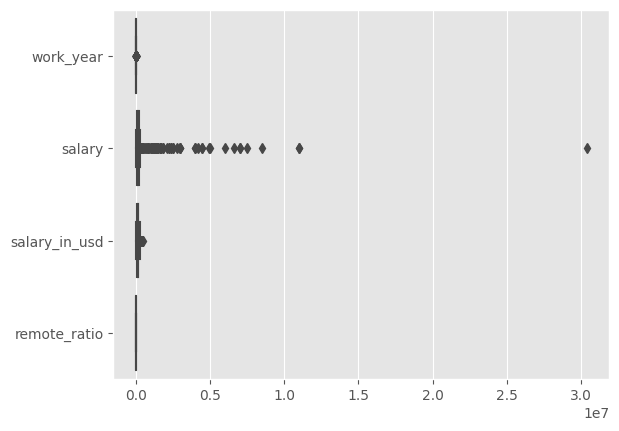

In [24]:
#para entender melhor essas estatísticas descritivas e identificar possíveis outliers:
sns.boxplot(df[num_cols], orient='h')

Percebe-se que por problemas de escala, o gráfico ficou muito ruim para entender, sendo assim, vamos plotar de maneira individual cada coluna

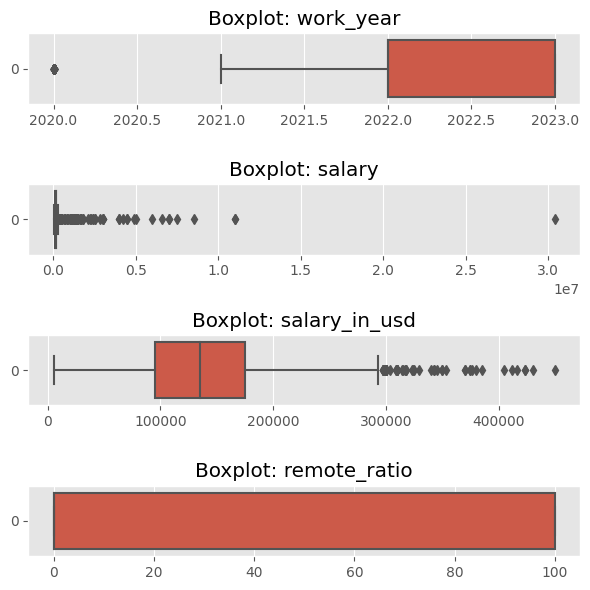

In [38]:
#Há valores discrepantes ou inconsistentes?
plt.figure(figsize=(6,6))                       #tamanho da figura
for i, col in enumerate(df[num_cols], start=1): #gerando a variável 'i' com a posição e col com o 'nome' da coluna
  plt.subplot(df[num_cols].shape[1],1,i)        #criando subplots de acordo com numero de colunas 
  sns.boxplot(df[col], orient='h')              #boxplot horizontal
  plt.title(f'Boxplot: {col}')                  #titulo para identificar a coluna
  plt.tight_layout()                            #ajustando o gráfico

Em primeira instancia, percebe-se:
* Poucos dados de 2020
* Salário com a presença de muitos outliers
* Salário em dolar com menos outliers (possivelmente a representação em diferentes cotações de moedas geram essa maior discrepância entre os salários em diversas moedas)
* Frequência de trabalho remoto 

# Distribuição dos dados

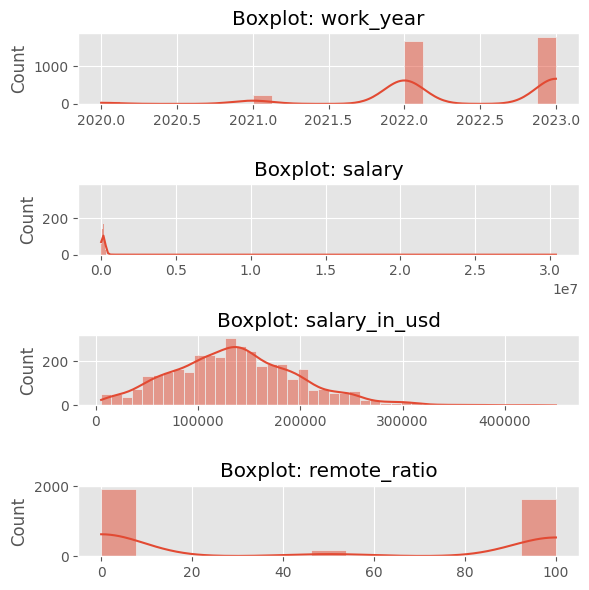

In [42]:
#Há valores discrepantes ou inconsistentes?
plt.figure(figsize=(6,6))                       #tamanho da figura
for i, col in enumerate(df[num_cols], start=1): #gerando a variável 'i' com a posição e col com o 'nome' da coluna
  plt.subplot(df[num_cols].shape[1],1,i)        #criando subplots de acordo com numero de colunas 
  sns.histplot(df[col], kde=True)               #boxplot horizontal
  plt.title(f'Boxplot: {col}')                  #titulo para identificar a coluna
  plt.xlabel('')                                #removendo o x label
  plt.tight_layout()                            #ajustando o gráfico

Vamos investigar a fundo a questão do salário, ao que parece, a distribuição está dessa forma pois diferentes moedas apresentam cotações muito distantes

## Salary, salary_in_usd

<Axes: xlabel='salary', ylabel='salary_currency'>

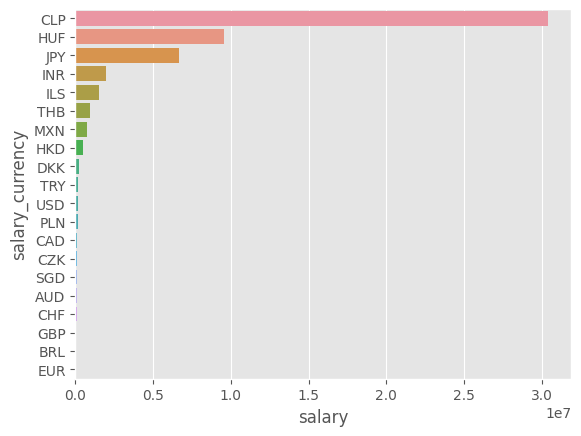

In [70]:
salario_medio_por_moeda = df.groupby('salary_currency').salary.mean().reset_index() #gerando dataset com a média salarial para cada moeda
sns.barplot(data = salario_medio_por_moeda.sort_values(by='salary',ascending=False),#gráfico de barras horizontal para mostrar o dataset gerado em ordem decrescente
            y='salary_currency',
            x='salary')

Pode-se perceber que os maiores salários são em: 
* Pesos chilenos (CLP)
* Florim hungaro (HUF)
* Iene japonês   (JPY)

Ao pesquisar, indetifica-se que essas moedas apresentam um valor muito baixo, dessa forma os salários aparentam ser muito alto, porém não deve se comportar da mesma forma ao analisar o salário em dólar

<Axes: xlabel='salary_in_usd', ylabel='salary_currency'>

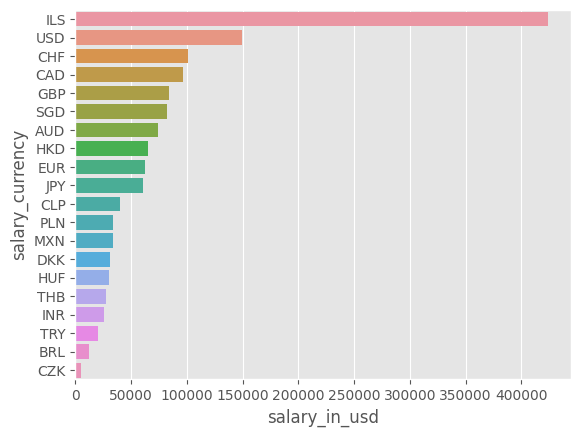

In [72]:
salario_dol_medio_por_moeda = df.groupby('salary_currency').salary_in_usd.mean().reset_index() #gerando dataset com média salarial em dolar de acordo com a moeda
sns.barplot(data = salario_dol_medio_por_moeda.sort_values(by='salary_in_usd',ascending=False),#plotando o dataset
            y='salary_currency',
            x='salary_in_usd')

Pode-se perceber que apesar de salários altos, quando convertidos para dólar, os salários não se comportam da mesma forma e apresentam uma distribuição muito mais clara para entendimento

Dessa forma, vou optar por remover o salário na moeda local, e manter o salário em dólar para trabalhar com um padrão

In [73]:
df = df.drop(columns=['salary']) #removendo a coluna com salários em moedas distintas

## Analisar a contagem de casos de alguns atributos

In [74]:
#criando função para facilitar o plot
def count_plot(col, df):                                #criando função
  ax = sns.countplot(x=col, data=df)                    #gráfico de barras que recebe a coluna desejada e o dataset    
  for p in ax.patches:                                  #percorrendo os valores de X e Y das barras
    plt.annotate(p.get_height(),                        #escrevendo o valor de Y na posição (X,Y) de cada barra
                xy=(p.get_x()+0.2, p.get_height()+15))

### Work year

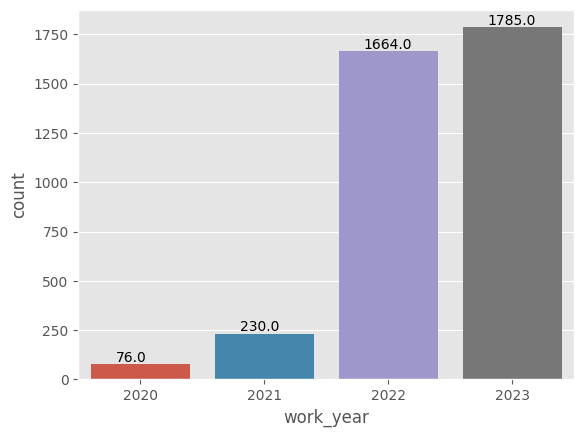

In [75]:
count_plot('work_year')  #vendo a quantidade de casos para cada ano

Grande maioria dos casos são de 2022 e 2023

Vamos verificar como a média salarial se comportou durante os anos

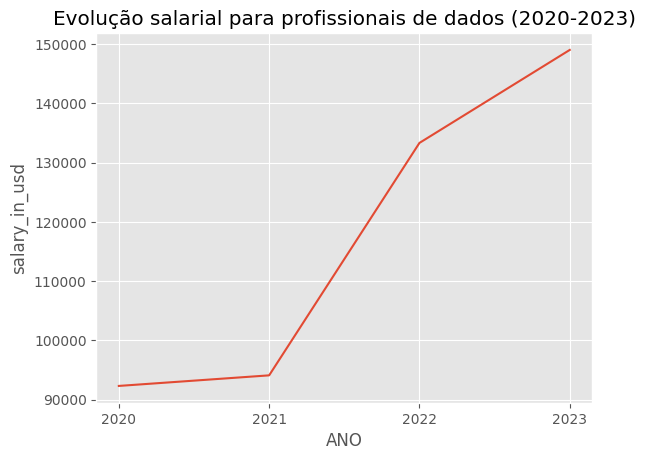

In [91]:
salario_usd_ano = df.groupby('work_year').salary_in_usd.mean().reset_index()  #média salarial por ano
ax = sns.lineplot(x='work_year',y='salary_in_usd', data=salario_usd_ano)      #gráfico de linhas (melhor opção para comparativos com datas)
ax.set(title='Evolução salarial para profissionais de dados (2020-2023)',     #titulo
       xlabel='ANO',                                                          #label de x
       xticks=[2020,2021,2022,2023]);                                         #definindo os xticks para os anos em numeros inteiros

Percebe-se que o profissional de dados, em média, passou a receber salários maiores com o passar dos anos e no ano de 2023 esse salário chega em média a quase 150K dolares por ano.

### Experience Level

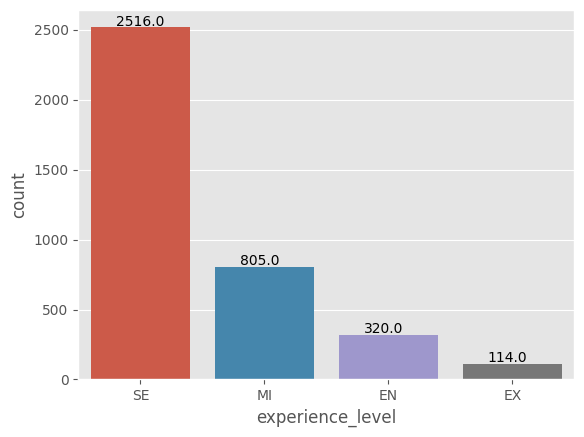

In [77]:
count_plot('experience_level', df)

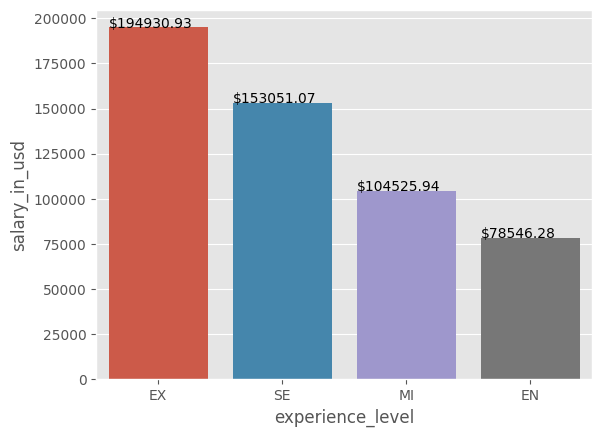

In [101]:
salario_usd_por_experiencia = df.groupby('experience_level').salary_in_usd.mean().reset_index() #criando dataset com média salarial por nível de experiência
ax = sns.barplot(x='experience_level', y='salary_in_usd',                                       #realizando o plot do dataset em barras
            data = salario_usd_por_experiencia.sort_values(by='salary_in_usd', ascending=False))
for p in ax.patches:                                                                            
  plt.annotate(f'${round(p.get_height(),2)}', xy=(p.get_x(), p.get_height()))

Podemos perceber que a média salarial segue uma ordem lógica, na qual, em ordem crescente de salario:
* entry level -> mid level -> senior level -> executive level

# Employment type

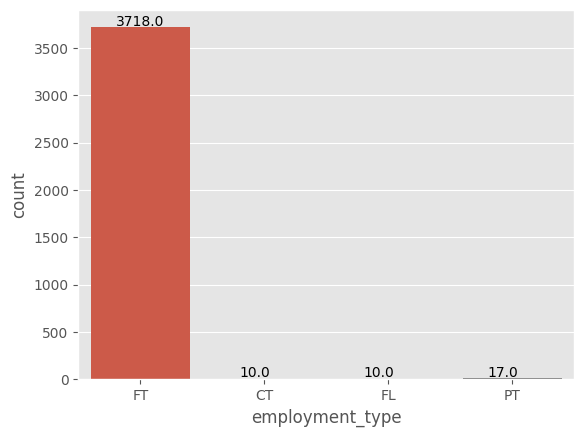

In [102]:
count_plot('employment_type', df)

In [106]:
df.employment_type.value_counts(normalize=True) # % de cada valor

FT    0.990146
PT    0.004527
CT    0.002663
FL    0.002663
Name: employment_type, dtype: float64

Percebe-se que a distribuição das classes para essa coluna estão muito desbalanceadas. Dessa forma, pode-se pensar se essa feature realmente tem relevância para o conjunto de dados, visto que 99% dos casos são de trabalhos Full Time

In [107]:
df = df.drop(columns='employment_type')

### Job_title

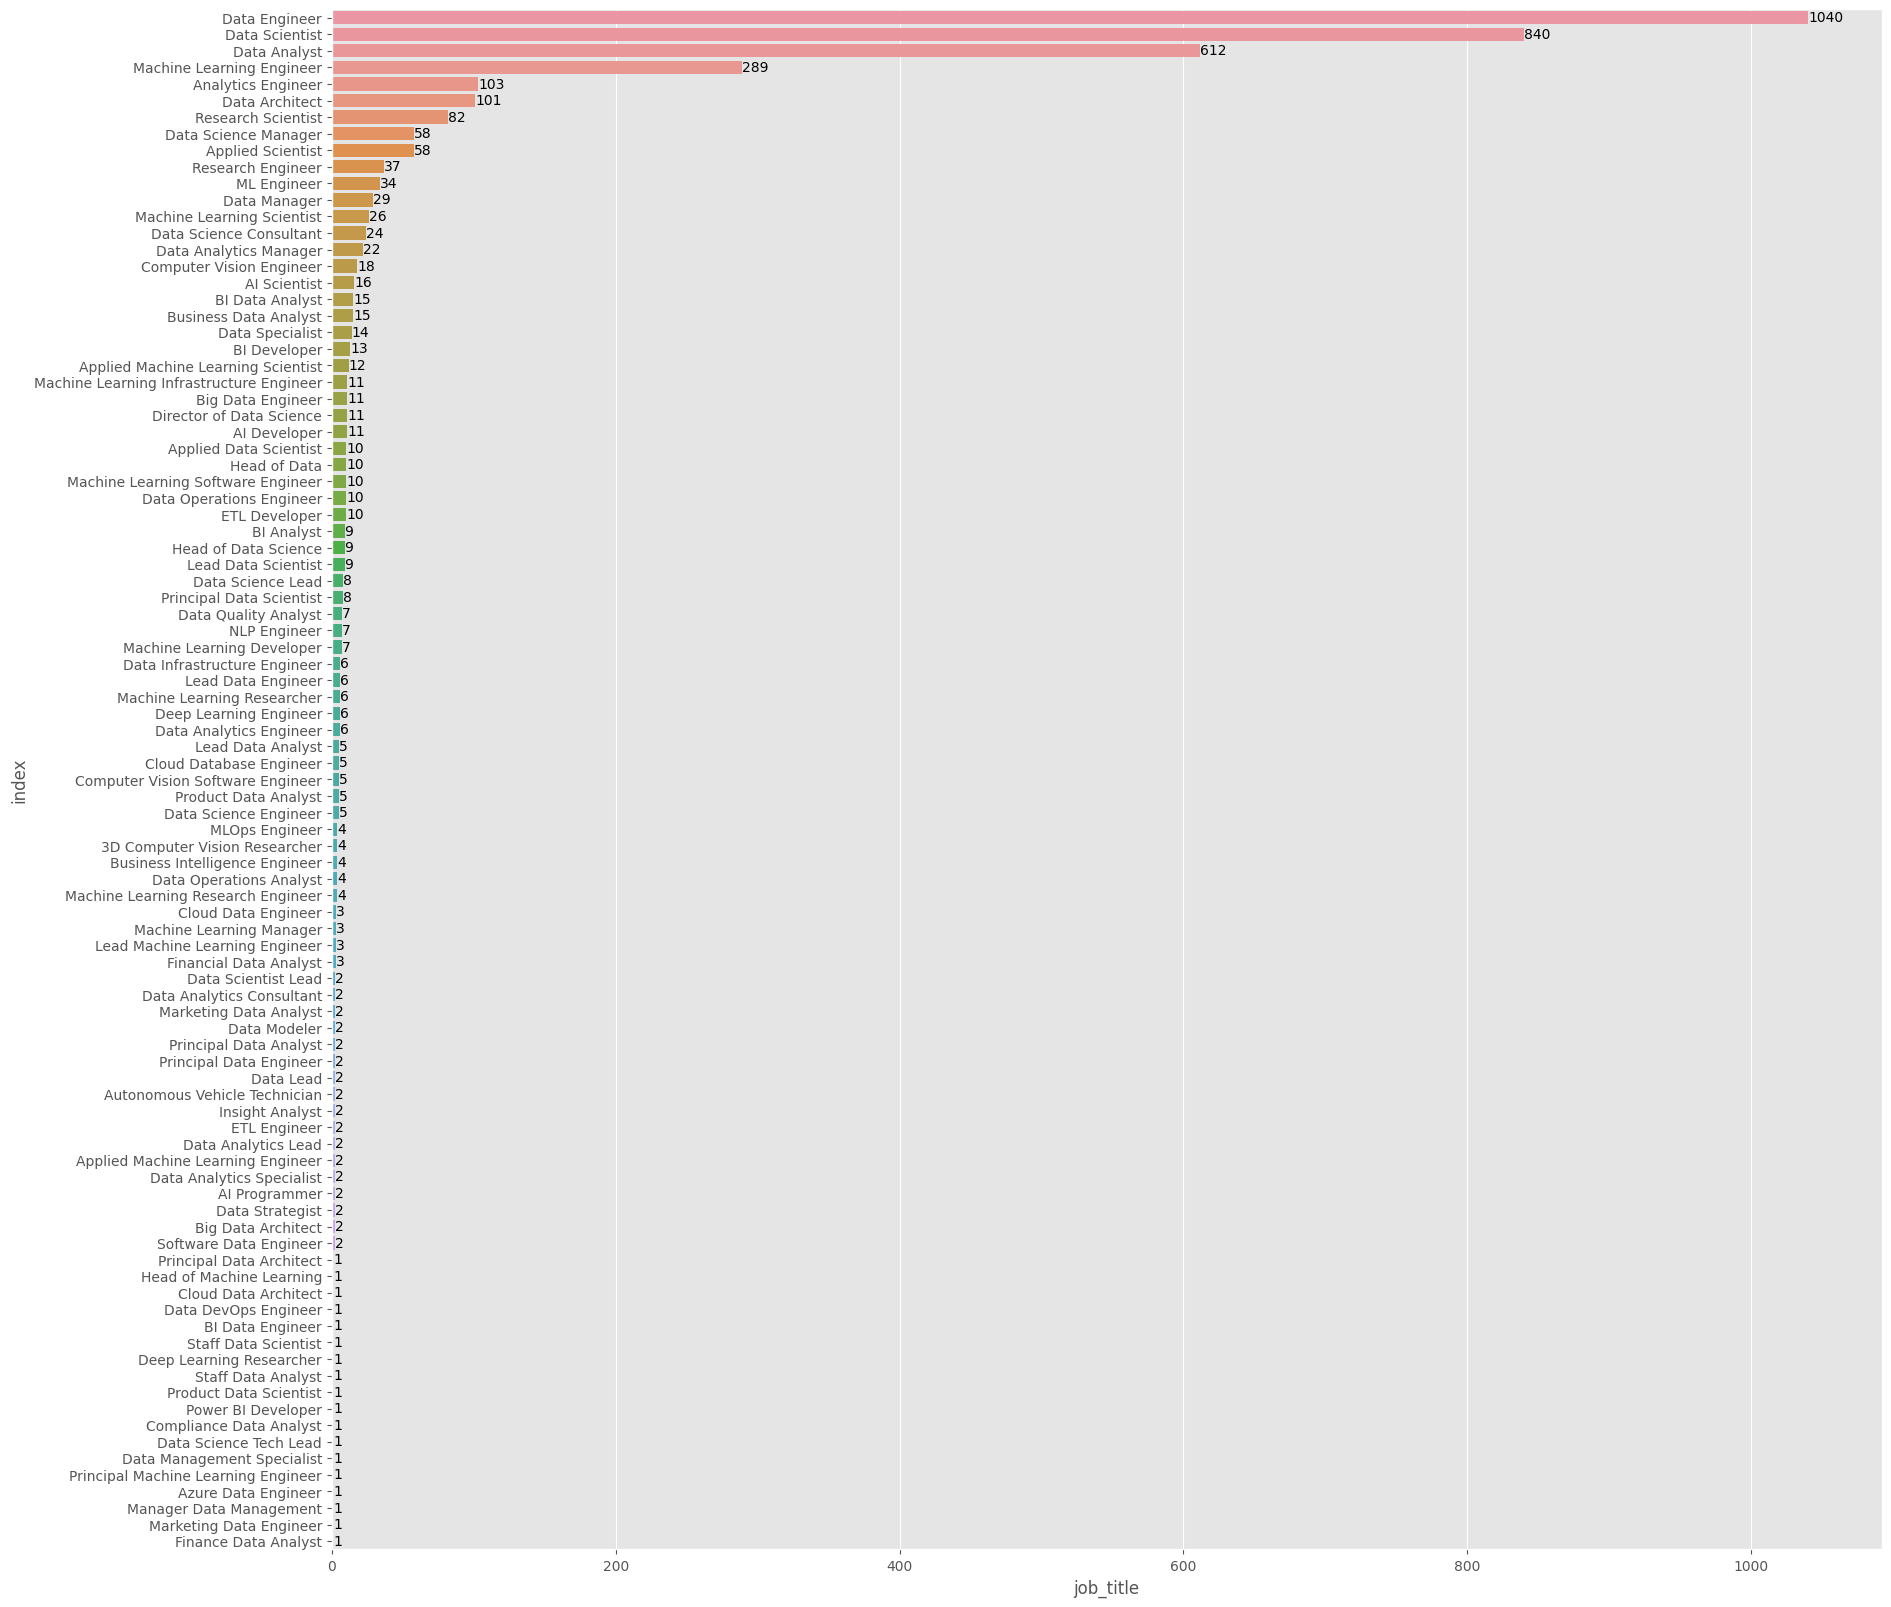

In [127]:
job_title_count = df.job_title.value_counts().reset_index()
plt.figure(figsize=(20,20))
ax = sns.barplot(data=job_title_count, y='index', x='job_title')
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

Percebe-se que a lista com funções é bem extenso e muitas dessas funções apresentam pouquissimos casos para serem analisados. Com isso, há de se pensar em definir o threshold para diminuir o número de funções a serem analisadas posteriormente pelo modelo de regressão.

Text(10, 0.866577896138482, '0.87%')

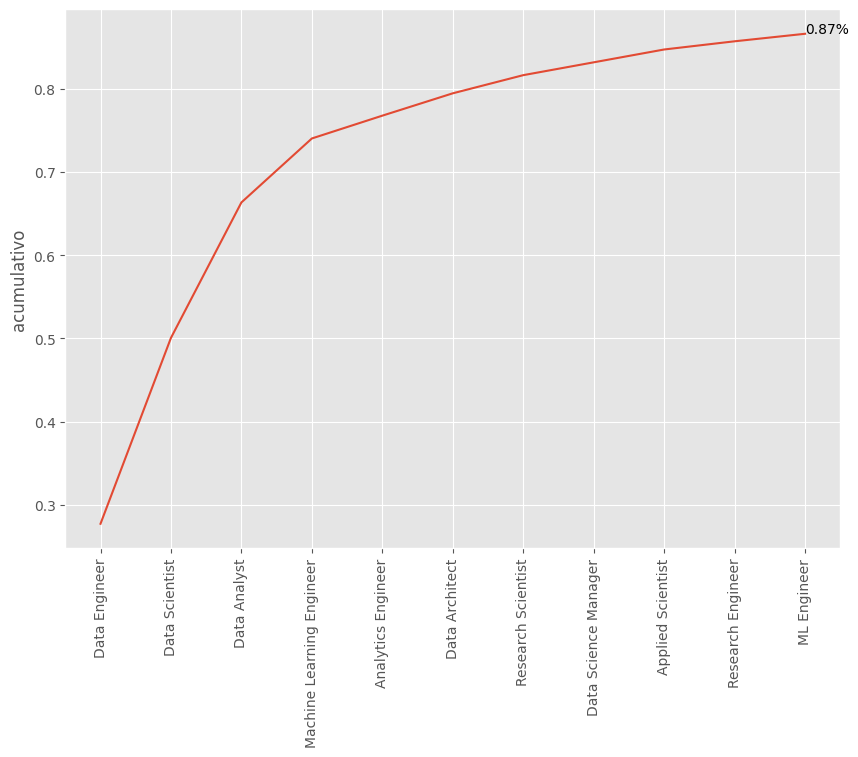

In [190]:
participacao_jobs = df.job_title.value_counts(normalize=True).reset_index()
participacao_jobs.columns = ['job_title','participacao']
participacao_jobs['acumulativo'] = participacao_jobs['participacao'].cumsum()

fig = plt.figure(figsize=(10,7))
sns.lineplot(x='job_title', y='acumulativo', data=participacao_jobs[:11]);
plt.xlabel('')
plt.xticks(rotation=90);
plt.annotate(f'{round(participacao_jobs.iloc[10].acumulativo, 2)}%', xy=(10, participacao_jobs.iloc[10].acumulativo))

Para os dados do modelo de regressão futuro, utilizarei apenas os 'job_title' que apresentarem ao menos 30 casos registrados. Dessa forma, utilizaria 11 tipos únicos de job_title que abrangeriam 87% dos casos do dataset com as funções do principais cargos na área de Dados